# Matplotlib

Es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en
Python. Esta sirve de apoyo para toda la computación científica, ya que permite
mostrar sus resultados gráficamente y poder hacer análisis visuales.

Es importante conocer primero las funciones, los tipos de figuras y los patrones de
uso de la biblioteca, para luego poder hacer uso de ella y aplicarlo a otras funciones
científicas.

Básicamente, existen dos elementos de representación en Matplotlib:
* **La figura o ventana** en la que se insertarán los gráficos y todos los elementos de
configuración estética, como títulos, leyendas u otros. Es un objeto de la clase
`matplotlib.figure.Figure`
* **Los ejes**, que en realidad son las áreas de la figura que representan los gráficos
propiamente dichos, representan una región de la figura con el espacio de datos.
Son objetos de la clase `matplotlib.axes.Axes`


Todas las funciones de trazado esperan NumPy.array como entrada. Las clases que
son similares a los arrays, como los objetos de datos de pandas y NumPy.matrix,
pueden o no funcionar como se pretende. Es mejor convertirlas a objetos
NumPy.array antes de graficar.

De lo expuesto, se desprende que una forma de visualización se basa en usar el estilo
orientado a objetos creando, explícitamente, figuras y ejes y llamar a métodos sobre
ellos.

Pero existe otra forma relativamente sencilla, que es usar pyplot para crear y
gestionar automáticamente las figuras y los ejes, y utilizar las funciones de este para
el trazado.

Las funciones principales para crear figuras son:
* `figure`: crear una figura
* `subplot`: crea varias graficas en la misma ventana
* `plot`: varias gráficas en una única gráfica

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Gráficas de lineas

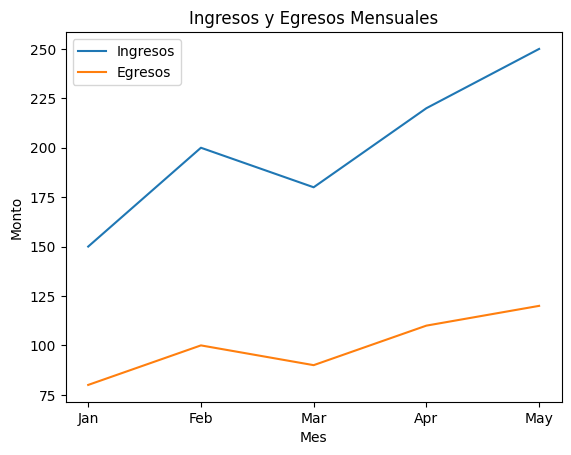

In [3]:
# Creating a basic example dataset
data = {
    "Mes": ["Jan", "Feb", "Mar", "Apr", "May"],
    "Ingresos": [150, 200, 180, 220, 250],
    "Egresos": [80, 100, 90, 110, 120],
}
df = pd.DataFrame(data)

# Gráfica de ingresos por mes
plt.plot(df["Mes"], df["Ingresos"], label='Ingresos')

# Gráfica de egresos por mes
plt.plot(df["Mes"], df["Egresos"], label='Egresos')

# Etiquetas de los ejes
plt.xlabel("Mes")
plt.ylabel("Monto")

# Título de la gráfica
plt.title("Ingresos y Egresos Mensuales")

# Etiqueta de las líneas
plt.legend()

# Mostrar el gráfico
plt.show()

Y si mejoramos un poco?

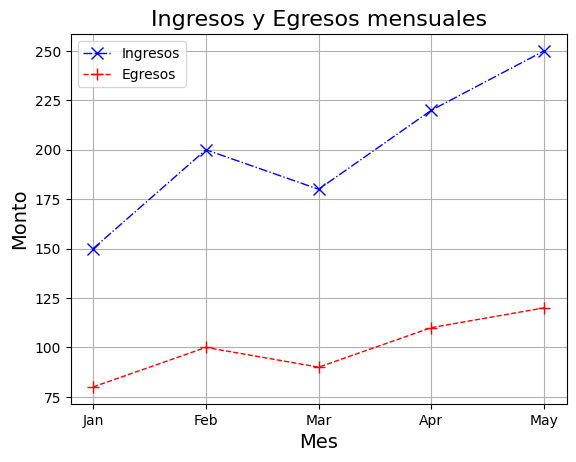

In [8]:
plt.plot(
    df["Mes"],  # Valor del eje X
    df["Ingresos"],  # Valor del eje y
    marker="x",  # Marcador de cada punto:
    color="blue",  # Color de la línea
    linestyle="-.",  # Estilo de la línea: -, --, -.
    linewidth=1,  # Grueso de la linea
    markersize=8,  # Tamaño del marcador
    label="Ingresos",
)  # Etiqueta de esta línea
plt.plot(
    df["Mes"],
    df["Egresos"],
    marker="+",
    color="red",
    linestyle="--",
    linewidth=1,
    markersize=8,
    label="Egresos",
)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Monto", fontsize=14)
plt.title("Ingresos y Egresos mensuales", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

## Gráficas de Barras

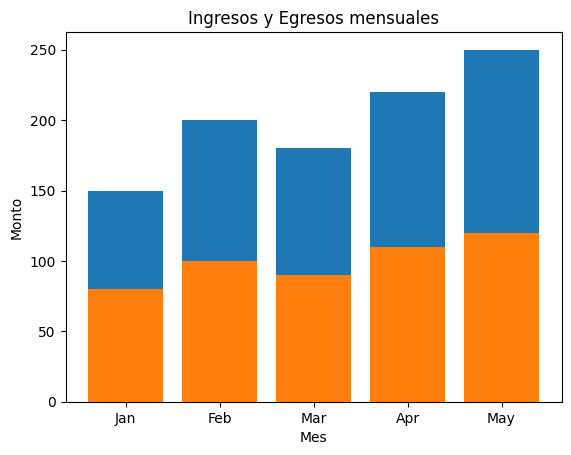

In [21]:
plt.bar(df["Mes"], df["Ingresos"])
plt.bar(df["Mes"], df["Egresos"])
plt.xlabel("Mes")
plt.ylabel("Monto")
plt.title("Ingresos y Egresos mensuales")
plt.show()

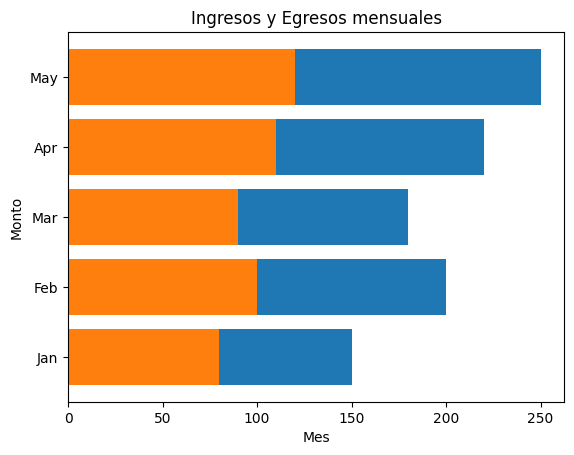

In [23]:
plt.barh(df["Mes"], df["Ingresos"])
plt.barh(df["Mes"], df["Egresos"])
plt.xlabel("Monto")
plt.ylabel("Mes")
plt.title("Ingresos y Egresos mensuales")
plt.show()

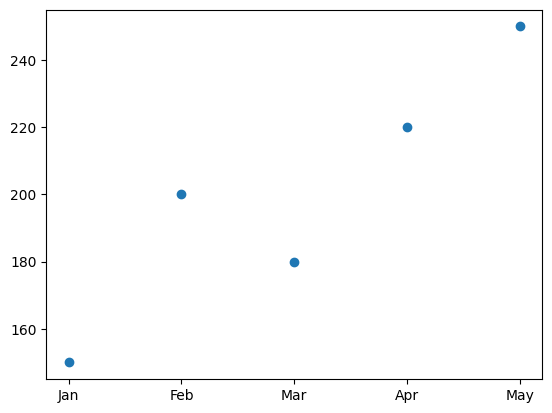

In [9]:
plt.scatter(df["Mes"], df["Ingresos"])

Mejorando la gráfica:

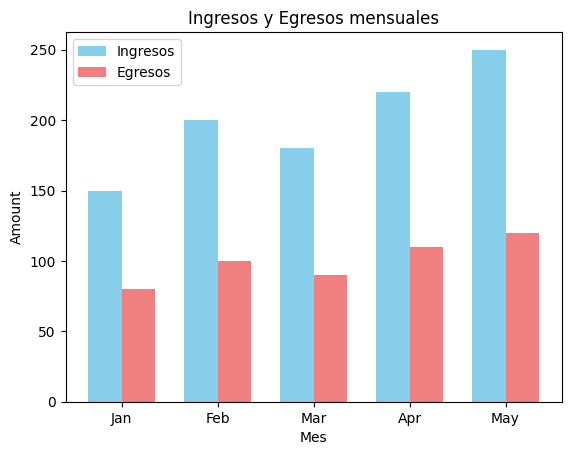

In [28]:
bar_width = 0.35  # Ancho de las columnas
bar_positions = range(len(df["Mes"]))  # Cantidad de columnas que vamos a tener

plt.bar(
    bar_positions,
    df["Ingresos"],  # Valor del eje y
    width=bar_width,  # Ancho de la barra
    color="skyblue",  # Color de la barra
    label="Ingresos",  # Etiqueta de la barra
)
plt.bar(
    [pos + bar_width for pos in bar_positions],
    df["Egresos"],  # Valor del eje y
    width=bar_width,  # Ancho de la barra
    color="lightcoral",  # Color de la barra
    label="Egresos",  # Etiqueta de la barra
)

plt.xlabel("Mes")
plt.ylabel("Amount")
plt.title("Ingresos y Egresos mensuales")
plt.xticks([pos + bar_width / 2 for pos in bar_positions], df["Mes"])
plt.legend()
plt.show()

## Otras opciones

Vamos a crear en una sola gráfica la representación de las funciones:
- $y = x$
- $y = x^2$
- $y = x^3$

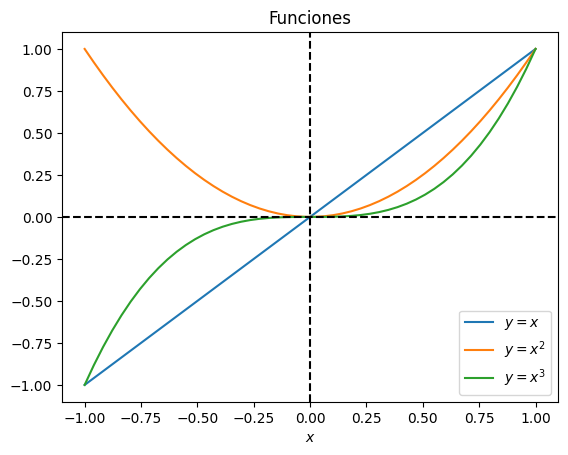

In [11]:
# Rango de valores de X
x = np.linspace(-1, 1)

# Gráfica de las funciones
figura, graficas = plt.subplots()
graficas.plot(x, x, label="$y=x$")
graficas.plot(x, x**2, label="$y=x^2$")
graficas.plot(x, x**3, label="$y=x^3$")

# Ejes y malla
graficas.axhline(0, color="black", linestyle="--")
graficas.axvline(0, color="black", linestyle="--")

# Títulos de eje y de gráfica
graficas.set_xlabel("$x$")
graficas.set_title("Funciones")
graficas.legend()

O si quisieramos verla en gráficas separadas tendríamos:

Text(0.5, 1.0, '$y=x^3$')

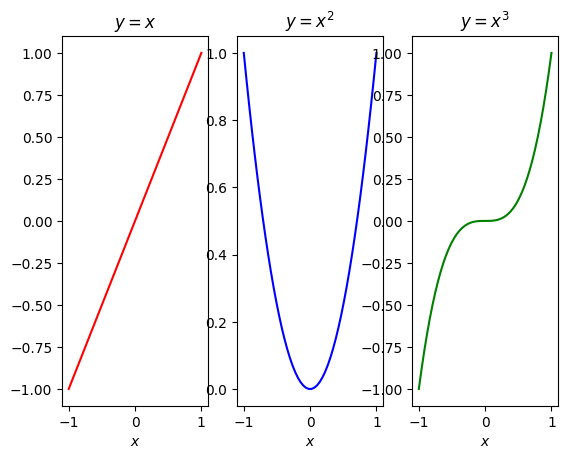

In [11]:
# Rango de valores de X
x = np.linspace(-1, 1)

# Gráfica de las funciones
figura, graficas = plt.subplots(1, 3)

graficas[0].plot(x, x, label="$y=x$", color="red")
graficas[1].plot(x, x**2, label="$y=x^2$", color="blue")
graficas[2].plot(x, x**3, label="$y=x^3$", color="green")


# Títulos de eje y de gráfica
[graficas[i].set_xlabel("$x$") for i in range(3)]
graficas[0].set_title("$y=x$")
graficas[1].set_title("$y=x^2$")
graficas[2].set_title("$y=x^3$")

# Actividad

Represente en una gráfica de 2 columnas y 2 filas las siguientes funciones:
* $f(x) = \sin(x)\quad x \in [0, 2 \pi]$
* $f(x) = \cos(x)\quad x \in [0, 2 \pi]$
* $f(x) = \log(x)\,\sin(x^2)\quad x \in [0, 5]$
* $f(x) = \frac{\sin(x)}{x} \quad \text{y} \quad \sin(x)\,e^{-x}\quad x \in [0,20]$

# Actividad

Escribir el código que genere la siguiente gráfica, cuyas funciones son:
- $f(x) = \sin(x)$
- $f(x) = \sin(x) + \sin(5x)$
- $f(x) = \sin(x) \, e^{-x/10}$

<img src="funciones.png" width="800">